![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Numerical Methods in Geotechnical Engineering**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Exercise on the least squares method

You're given a CPT data set consisting of cone resistance $q_\text{c}$ and frictional resistance $f_\text{s}$ measurements. Your first task is to check the results by plotting them and to compute as well as plot the friction ratio $R_\text{f}$.

In [32]:
import numpy as np #numerical methods
#import sympy as sp #symbolic operations
import matplotlib.pyplot as plt #plotting
import pandas as pd

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/CPT_plots.ipynb

In [33]:
CPT_data = pd.read_csv('Data/CPT_2015.csv')

In [34]:
CPT_data

,Teufe,qc,fs
0,[m],[MN/m²],[MN/m²]
1,0.0000000000,0.0000000000,0.0000000000
2,0.0200000000,0.0000000000,0.0000000000
3,0.0400000000,0.0672000000,0.0000000000
4,0.0600000000,0.1176000000,0.0002000000
...,...,...,...
1287,25.7200000000,4.8557000000,0.0518000000
1288,25.7400000000,4.8280000000,0.0497000000
1289,25.7600000000,4.8296000000,0.0497000000
1290,25.7800000000,4.8479000000,0.0497000000


In [35]:
z = CPT_data.Teufe[1:].to_numpy(dtype=float)
qc = CPT_data.qc[1:].to_numpy(dtype=float)
fs = CPT_data.fs[1:].to_numpy(dtype=float)
with np.errstate(divide='ignore',invalid='ignore'):
    Rf = np.divide(fs,qc)

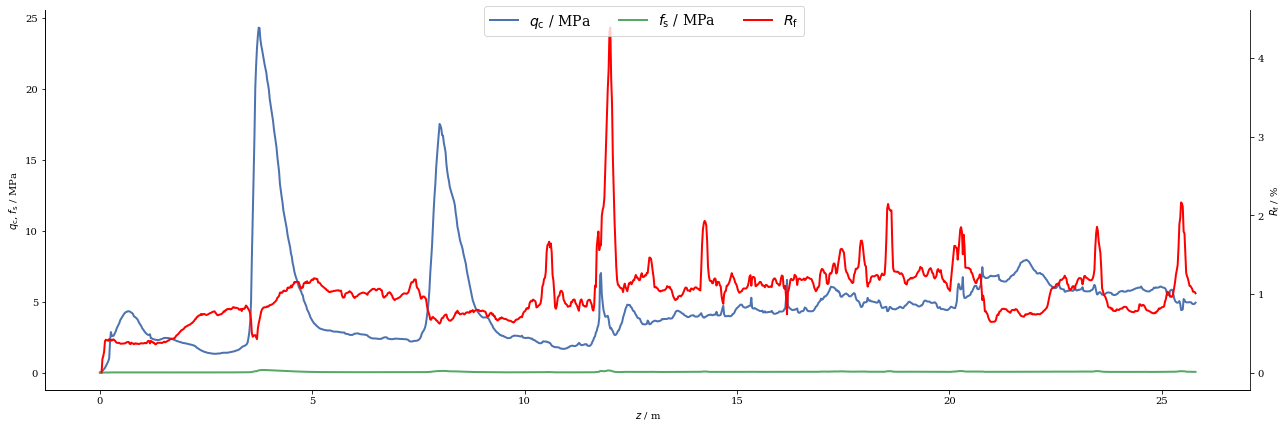

In [36]:
plot_CPT_raw(z,qc,fs,Rf)

You're also given data on the relationship between $q_\text{c}$ and $I_\text{D}$. The data is valid only for $z > 2$ m as well as above the phreatic surface. Your task is now to find a functional relationship $I_\text{D}(q_\text{c})$ in order to estimate the $I_\text{D}$ distribution in the above soil profile investigated with cone prenetration testing.

In [37]:
ID_data = pd.read_csv('Data/qc_ID.csv')

In [38]:
ID_data

,qc,ID
0,MPa,NaN
1,3,0.025327
2,6,0.189061
3,9,0.407843
4,12,0.361879
...,...,...
67,11,0.510890
68,15,0.538081
69,19,0.634794
70,23,0.719363


In [39]:
qc_ID = ID_data.qc[1:].to_numpy(dtype=float)
ID = ID_data.ID[1:].to_numpy(dtype=float)

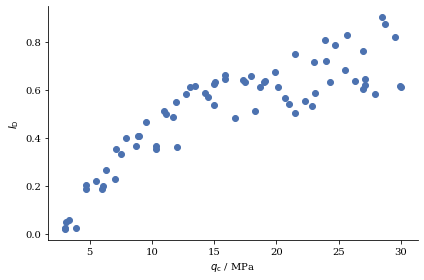

In [40]:
plot_ID_raw(qc_ID, ID)

The profile appears to be a logarithmic function (you may also employ a polynomial formulation), i.e. we choose an Ansatz

$$
    I_\text{D}^\text{mod} = a + b \log q_\text{c}
$$

The first task at hand is now to identify the free parameters $a$ and $b$.

For that purpose, we would like to minimize the overall deviation between the model $I_\text{D}^\text{mod}(q_\text{c})$ and the experimental data $(I_\text{D},\, q_\text{c})$.

To measure this deviation, we introduce the error or residual 

$$
    r = I_\text{D}^\text{mod} - I_\text{D}
$$

and seek the minimum of the squared error functional. In other words, we use the least squares approach:

\begin{align}
    a, b &= \text{arg}\,\text{min} \int \limits_{q_\text{c}^\text{min}}^{q_\text{c}^\text{max}} \frac{1}{2} r(q)^2\,\text{d} q
    \\
    &= \text{arg}\,\text{min} \sum \limits_{i=1}^{n_\text{exp}} \frac{(I_\text{D}^\text{mod} - I_\text{D})_i^2}{2}
\end{align}

We have two unknowns and require two equations. The necessary conditions for finding the minimum are given by:

\begin{align}
    0 &= \frac{\partial}{\partial a} \sum \limits_{i=1}^{n_\text{exp}} \frac{(I_\text{D}^\text{mod} - I_\text{D})_i^2}{2}
    \\
    0 &= \frac{\partial}{\partial b} \sum \limits_{i=1}^{n_\text{exp}} \frac{(I_\text{D}^\text{mod} - I_\text{D})_i^2}{2}
\end{align}

This can be reformulated as

\begin{align}
    0 &= \sum \limits_{i=1}^{n_\text{exp}} \left. \frac{\partial I_\text{D}^\text{mod}}{\partial a} \right|_i (I_\text{D}^\text{mod} - I_\text{D})_i
    \\
    0 &= \sum \limits_{i=1}^{n_\text{exp}} \left. \frac{\partial I_\text{D}^\text{mod}}{\partial b} \right|_i (I_\text{D}^\text{mod} - I_\text{D})_i
\end{align}

The necessary partial derivatives are given by

\begin{align}
    \frac{\partial I_\text{D}^\text{mod}}{\partial a} &= 1
    \\
    \frac{\partial I_\text{D}^\text{mod}}{\partial b} &= \log q_\text{c}
\end{align}

Thus, we arrive at the following set of equations to solve for $a$ and $b$:

\begin{align}
    0 &= \sum \limits_{i=1}^{n_\text{exp}} (a + b \log q_\text{c} - I_\text{D})_i
    \\
    0 &= \sum \limits_{i=1}^{n_\text{exp}} \log q_{\text{c},i} (a + b \log q_\text{c} - I_\text{D})_i
\end{align}

This results in the linear equation system $A x = \text{RHS}$:

\begin{align}
\begin{pmatrix}
n_\text{exp} & \sum \limits_{i=1}^{n_\text{exp}} \log q_{\text{c},i}
\\
\sum \limits_{i=1}^{n_\text{exp}} \log q_{\text{c},i} & \sum \limits_{i=1}^{n_\text{exp}} (\log q_{\text{c},i})^2
\end{pmatrix}
\begin{pmatrix}
a
\\
b
\end{pmatrix}
=
\begin{pmatrix}
\sum \limits_{i=1}^{n_\text{exp}} (I_\text{D})_i
\\
\sum \limits_{i=1}^{n_\text{exp}} (\log q_\text{c} I_\text{D})_i
\end{pmatrix}
\end{align}

Let's construct this system of equations and solve it:

In [41]:
RHS = np.array([ID.sum(),(np.log(qc_ID)*ID).sum()])

In [42]:
A = np.array([[len(ID),np.log(qc_ID).sum()],[np.log(qc_ID).sum(),(np.log(qc_ID)*np.log(qc_ID)).sum()]])

In [43]:
x = np.linalg.solve(A,RHS)
x

array([-0.29305064,  0.30846968])

As we see, $a\approx -0.293$ and $b \approx 0.308$. We put this into the model and then check whether it matches the data. For that purpose, we can now also compare model and data by plotting one over the other and compare them to an ideal line.

In [44]:
ID_mod = lambda qc: x[0] + x[1] * np.log(qc)

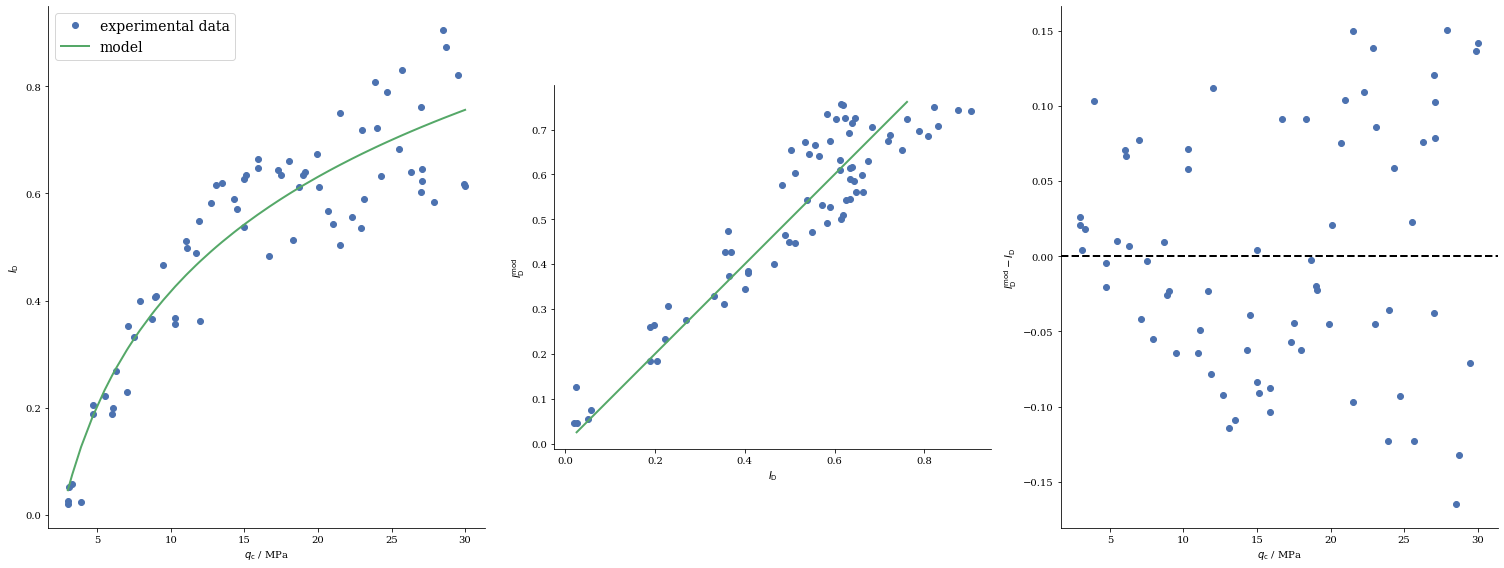

In [45]:
plot_ID_model(qc_ID, ID)

The visual inspection looks good.

We can quantify the coefficient of determination $R^2$. For that purpose we calculate the mean of the experimental data:

$$
    \bar{I}_\text{D} = \frac{1}{n_\text{exp}} \sum \limits_{i=1}^{n_\text{exp}} I_{\text{D},i}
$$

We can now estimate the variance of the experimental data:

$$
    \sigma^2_\text{exp} = \frac{1}{n_\text{exp}-1} \sum \limits_{i=1}^{n_\text{exp}} \left(I_{\text{D},i} - \bar{I}_\text{D} \right)^2
$$

We can compute a similar measure for the deviation between experimental data and model (the residual sum of squares):

$$
    \text{RSS} = \frac{1}{n_\text{exp}-1} \sum \limits_{i=1}^{n_\text{exp}} \left(I_{\text{D},i} - I_\text{D}^\text{mod} \right)^2
$$

We can now calculate the coefficient of determination:

$$
    R^2 = 1 - \frac{\text{RSS}}{\sigma^2_\text{exp}}
$$

Should the modelled values always match the experimental ones exactly, we'd arrive at $R^2=1$. If the model simply predicts the mean (so-called baseline model), we arrive at $R^2 = 0$. The more the model explains part of the variability of the data, the more $R^2$ approaches 1. If the model predictions are worse than the baseline model, $R^2$ is negative.

In [46]:
R_squared = 1. - np.sum((ID - ID_mod(qc_ID))**2) / np.sum((ID - ID.mean())**2)
print("The model has a coefficient of determination of R² = %.4f." %R_squared)

The model has a coefficient of determination of R² = 0.8565.


Now that we've established a model for the relationship between $I_\text{D}$ and $q_\text{c}$ as well as quantified it's reliability, we can come back to the task at hand and calculate the $I_\text{D}$ profile from the CPT data.

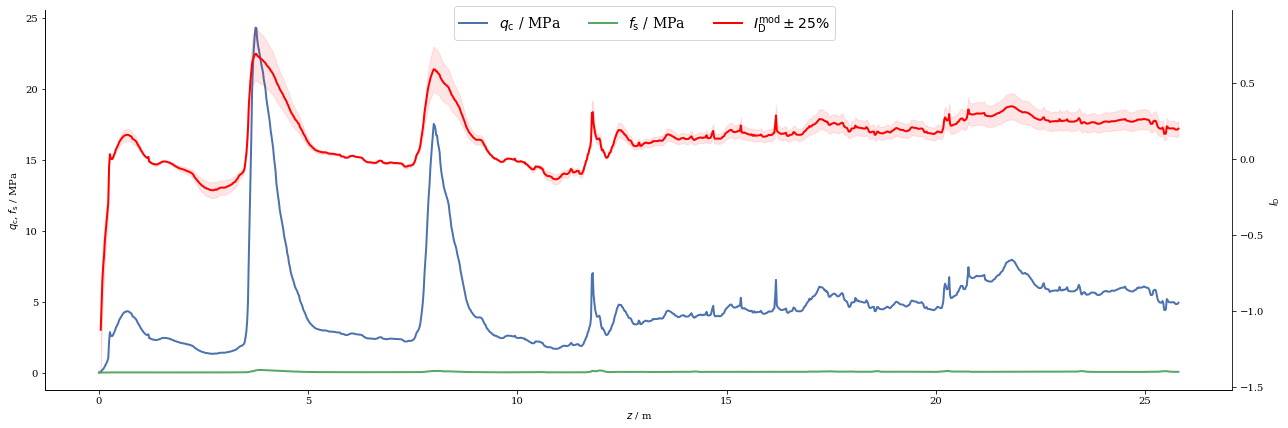

In [47]:
with np.errstate(divide='ignore',invalid='ignore'):
    plot_prediction(z,qc,fs,np.where(z>0.))

We observe a wide range of negative data. This is because the model was applied outside of the parameter range for which it is applicable. The model is calibrated only for $3\,\text{MPa} \leq q_\text{c} \leq 30\,\text{MPa}$ and is valid only in depths below $2\,\text{m}$. We therefore restrict its application to this range:

In [48]:
admissible_depths = np.where(z > 2.)
admissible_qcs = np.where(qc > 3.)

admissible_data_points = np.intersect1d(admissible_depths,admissible_qcs)

Now we can plot only those data points that are within the admissible model range:

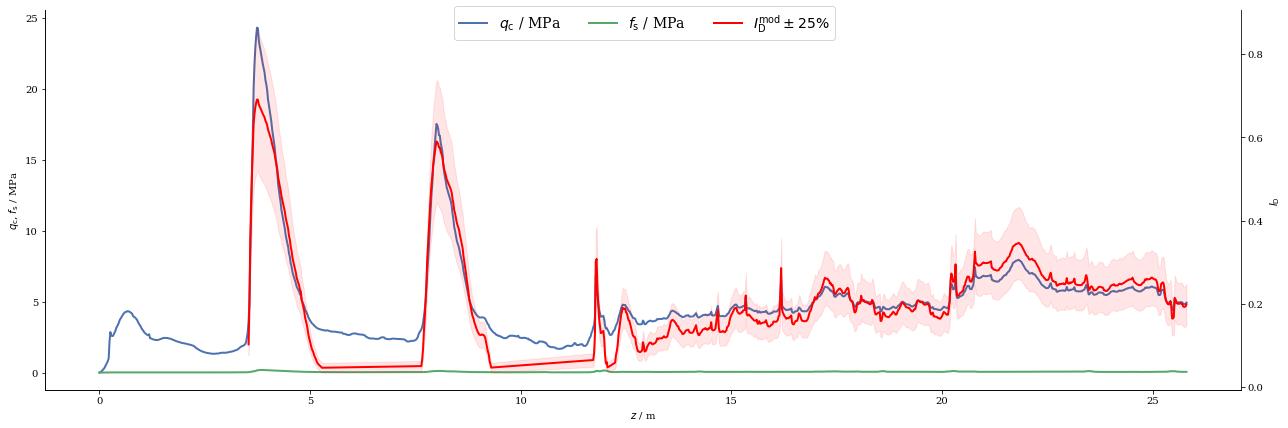

In [49]:
plot_prediction(z,qc,fs,admissible_data_points)

## Remarks

The idea of this exercise was to demonstrate a possible use case for and the workflow for a least squares analysis. The application of the $I_\text{D}$ correlation to explain the $q_\text{c}$ data is of course greatly simplified. There are other potential causes of an increase in $q_\text{c}$ that are not explained by this model. 

## Scaling test

viz. correlation

In [73]:
z_scaled = z + 1*(np.max(z)-z)/np.max(z)
qc_scaled = qc * (1 + 2 *(np.max(z)-z)/np.max(z))

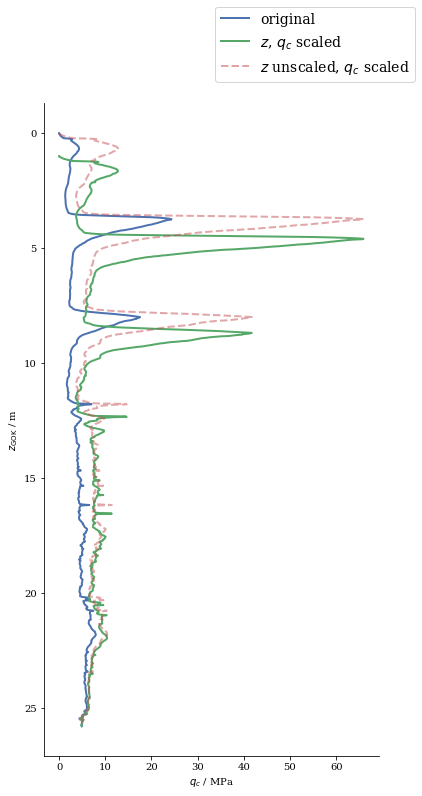

In [74]:
fig, ax = plt.subplots(figsize=(6,12))
ax.plot(qc,z,label='original')
#ax.plot(qc,z_scaled,label='$z$ scaled',ls='--',alpha=0.5)
ax.plot(qc_scaled,z_scaled, label='$z$, $q_c$ scaled')
ax.plot(qc_scaled,z, label='$z$ unscaled, $q_c$ scaled',ls='--',alpha=0.5)
ax.invert_yaxis()
ax.set_xlabel('$q_c$ / MPa')
ax.set_ylabel('$z_\mathrm{GOK}$ / m')
fig.legend();

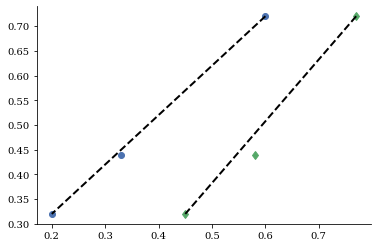

In [82]:
kt = [.72,0.32,0.44]
E = [0.6,0.2,0.33]
p = [0.77,0.45,0.58]
plt.plot(E,kt,marker='o',ls='')
plt.plot([max(E),min(E)],[max(kt),min(kt)],ls='--',color='black')
plt.plot(p,kt,marker='d',ls='')
plt.plot([max(p),min(p)],[max(kt),min(kt)],ls='--',color='black')

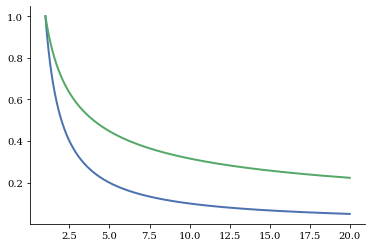

In [87]:
r = np.linspace(1,20,1000)
plt.plot(r,1/r)
plt.plot(r,1/np.sqrt(r))